In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from statsmodels.tsa.arima_model import ARMA, ARIMA, ARMAResults, ARIMAResults

In [4]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# We have basically imported this so that we can also check out the manual way of determining p,d,q values for ARIMA.

In [5]:
from pmdarima import auto_arima

In [6]:
df1 = pd.read_csv("C:\\Users\\shaleens\\Desktop\\Projects\\TimeSeriesUdacity\\TS Udemy Vids\\Time Series 2\\DailyFemaleBirths.csv", index_col=0, parse_dates=True)
df1.index.freq = 'D'
df1 = df1[:120]

In [7]:
# df2 = pd.read_csv("C:\\Users\\shaleens\\Desktop\\Projects\\TimeSeriesUdacity\\TS Udemy Vids\\Time Series 2\\", index_col=0, parse_dates=True)

### ARMA model:

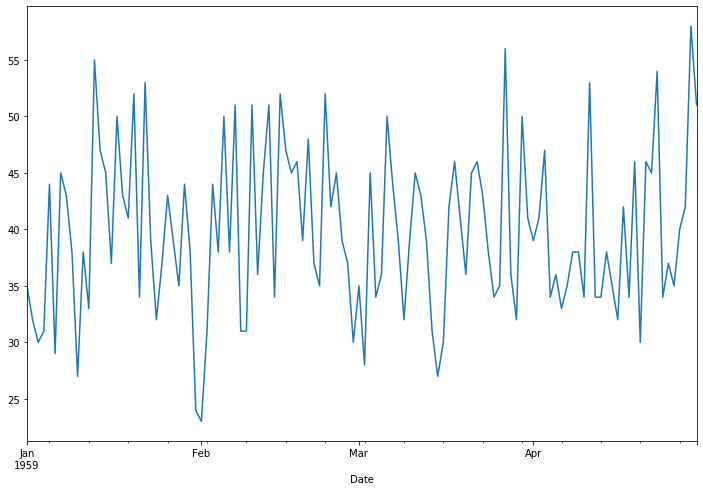

In [8]:
df1['Births'].plot(figsize=(12,8))

##### Lets check for Stationarity

In [9]:
# Lets use our created function to get the analysis out of adfuller test:

from statsmodels.tsa.stattools import adfuller

def adf_test(series, title=''):
    '''
    Pass in a time series and an optional title, function returns an ADF report
    '''
    print(f'Augmented Dickey-fuller test: {title}')
    result = adfuller(series.dropna(), autolag='AIC') # dropna() handles differenced data
    
    labels = ['adf test stats','p-value', '# of lags', '# of observations']
    out = pd.Series(result[0:4], index=labels)
    
    for key,val in result[4].items():
        out[f'critical value ({key})'] = val
    
    print(out.to_string())
    
    if result[1] <= 0.05:
        print("Null Hypothesis rejected! Time series is stationary!")
    else:
        print("Failed to reject Null Hypothesis! Time Series is not stationary!")

In [10]:
adf_test(df1['Births'])

Augmented Dickey-fuller test: 
adf test stats         -9.855384e+00
p-value                 4.373545e-17
# of lags               0.000000e+00
# of observations       1.190000e+02
critical value (1%)    -3.486535e+00
critical value (5%)    -2.886151e+00
critical value (10%)   -2.579896e+00
Null Hypothesis rejected! Time series is stationary!


In [11]:
## This confirms that our time series is Stationary.
## It means ARMA model should work for this!

In [15]:
step_fit = auto_arima(df1['Births'], start_p=0,max_p=5,start_q=0, max_q=5, trace=True)

Performing stepwise search to minimize aic
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=823.489, BIC=829.064, Time=0.009 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=824.647, BIC=833.010, Time=0.055 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=824.747, BIC=833.110, Time=0.049 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=1230.607, BIC=1233.395, Time=0.004 seconds
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=826.399, BIC=837.549, Time=0.180 seconds
Total fit time: 0.300 seconds


In [17]:
step_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  120
Model:                        SARIMAX   Log Likelihood                -409.745
Date:                Tue, 18 Feb 2020   AIC                            823.489
Time:                        12:52:02   BIC                            829.064
Sample:                             0   HQIC                           825.753
                                - 120                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.7833      0.687     57.896      0.000      38.437      41.130
sigma2        54.1197      8.319      6.506      0.000      37.815      70.424
===================================================================================
Ljung-Box (Q):                       44.41   Jarque-Bera (JB):                 2.69
Prob(Q):                              0.29   Prob(JB):                         0.26
Heteroskedasticity (H):               0.80   Skew:                             0.26
Prob(H) (two-sided):                  0.48   Kurtosis:                         2.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""